# Import libraries and newly merged dataset 

In [2]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 

In [3]:
# Path Variable 
path = r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\Instacart Basket Analysis'

# Import customer_ords_prods_merged dataframe
customer_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merge.pkl'))

In [4]:
# fixed spelling in number_of_dependents column
customer_ords_prods.rename(columns = {'number_of_dependants': 'number_of_dependents'}, inplace = True)

#### provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

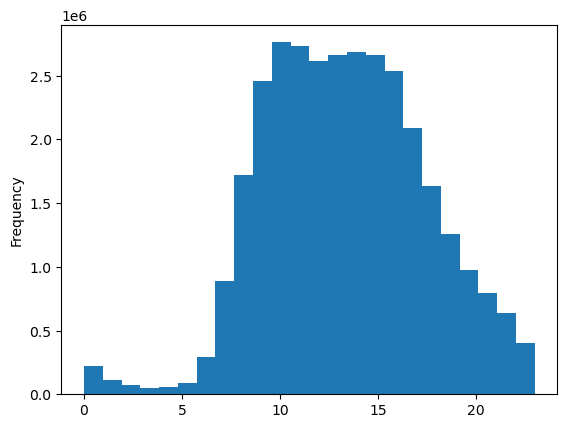

In [6]:
hist = customer_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

The historgram provides a visual of the average number of orders for each hour of the day. 
It appears as though the most orders occur in late morning / afternoon. 

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

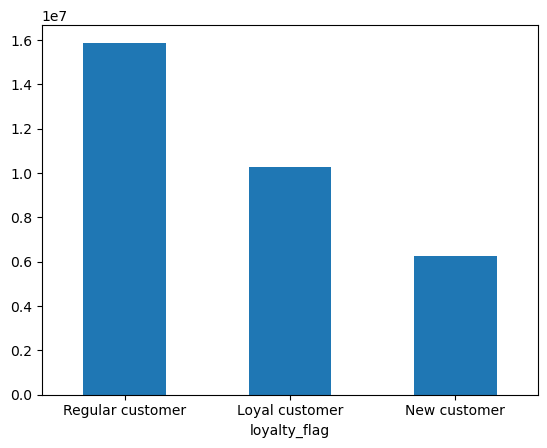

In [9]:
bar = customer_ords_prods['loyalty_flag'].value_counts().plot.bar()
plt.xticks(rotation=0)

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [11]:
# Create a sample of the data by generating a seed and a dev list with a 70/30 splt
np.random.seed(4)
dev = np.random.rand(len(customer_ords_prods)) <= 0.7

In [12]:
# store 70 % of the sample in the dataframe big 
big = customer_ords_prods[dev]

In [13]:
# store 30% of the sample in the dataframe small
small = customer_ords_prods[~dev]

In [14]:
# Check results 
len(customer_ords_prods)

32404859

In [15]:
# Check to see if sample subsets add up to total of original data above 
len(big) + len(small)

32404859

In [16]:
# reduce sample to only columns that are necessary 
customer_ords_prods_2 = small[['order_hour_of_day', 'prices']]

In [17]:
# Verify output 
customer_ords_prods_2.head(10)

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
12,12,4.4
13,12,3.0
19,7,8.6
21,15,9.0
22,15,4.4


In [18]:
# create line chart
line = sns.lineplot(data = customer_ords_prods_2, x = 'order_hour_of_day', y = sum'prices'))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [ ]:
# reduce sample size to include the age and number_of_dependents columns
customer_ords_prods_3 = small [['age', 'number_of_dependents']]

In [ ]:
# verify results of subset 
customer_ords_prods_3.head()

In [ ]:
line_2 = sns.lineplot(data= customer_ords_prods_3, x = 'age', y = 'number_of_dependents')

The line chart does not incidate any kind of trend with age and the number of dependents.

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [ ]:
# Create a smaller sample size using necessary columns
customer_ords_prods_4 = small[['age', 'income']]

In [ ]:
# Verify results 
customer_ords_prods_4.head()

In [ ]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = customer_ords_prods_4)

Across all age groups, a majority of individuals have similar incomes. However, as one gets older there is a better chance of a higher income.

# Export visualizations

In [ ]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [ ]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [ ]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [ ]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_compared_to_number_of_dependents.png'))

In [ ]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_compared_to_income.png'))